In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("lab2_cleaned_df.csv")

In [3]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002021,0.566690
stroke,-0.051087,1.000000,0.186761,0.100351
compression-ratio,0.002021,0.186761,1.000000,-0.214162
horsepower,0.566690,0.100351,-0.214162,1.000000


<AxesSubplot:xlabel='bore', ylabel='horsepower'>

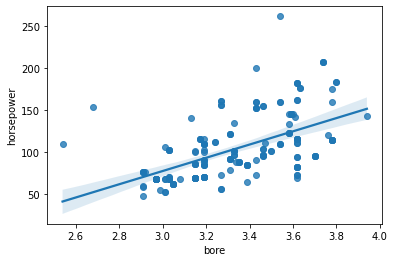

In [4]:
sns.regplot(x='bore',y='horsepower',data=df)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

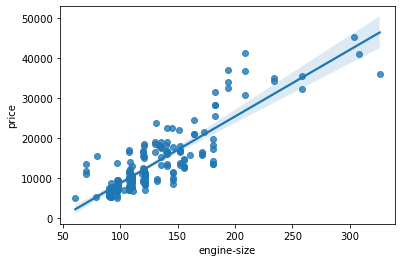

In [6]:
sns.regplot(x='engine-size',y='price',data=df)

In [7]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.083296
price,0.083296,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

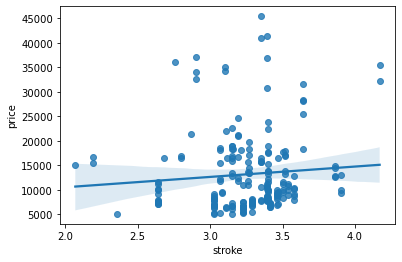

In [8]:
sns.regplot(x='stroke',y='price',data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

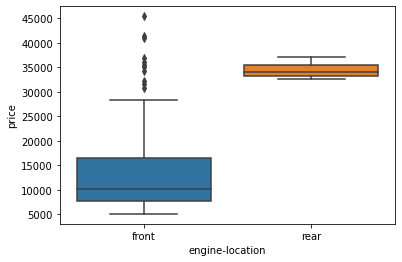

In [9]:
# for categorical vaeiable use boxplot
sns.boxplot(x='engine-location', y='price',data=df)

In [10]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,asp-type-std,asp-type-turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,102.415000,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.330000,...,5118.181818,25.200000,30.705000,13205.690000,9.937914,8.041663,0.100000,0.900000,0.820000,0.180000
std,58.931634,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,...,479.240110,6.432487,6.827227,7966.982558,2.539415,1.844764,0.300753,0.300753,0.385152,0.385152
min,0.000000,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,52.750000,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,102.500000,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,...,5159.090909,24.000000,30.000000,10270.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,153.250000,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,...,5500.000000,30.000000,34.000000,16500.750000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,203.000000,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [11]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


In [12]:
df['drive-wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

In [13]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,74
4wd,8


In [15]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheel_counts

,value_counts
fwd,118
rwd,74
4wd,8


In [17]:
drive_wheel_counts.index.name='drive-wheels'
drive_wheel_counts

,value_counts
drive-wheels,
fwd,118
rwd,74
4wd,8


In [18]:

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)


,value_counts
engine-location,
front,197
rear,3


In [19]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
df_group_one = df[['drive-wheels','body-style','price']]

In [21]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


In [23]:
df_group_test = df[['drive-wheels','body-style','price']]
df_gptest = df_group_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_gptest

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [25]:
# making pivot
grouped_pivot = df_gptest.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [26]:
grouped_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [27]:
gp_test2 = df[['body-style','price']].groupby(['body-style'],as_index=False).mean()

In [28]:
gp_test2

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

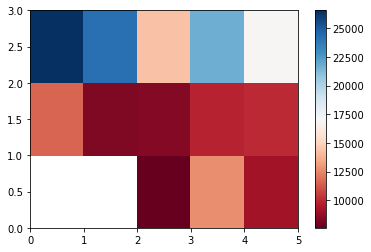

In [33]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<h1>Correlation</h1>

In [34]:
from scipy import stats

In [38]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
pearson_coef,p_value

(0.5891470005448705, 4.4570195020504053e-20)

<h1>ANOVA</h1>

In [45]:
grouped_test2 = df_group_test.groupby(['drive-wheels','price'],as_index=False).mean()
grouped_test2.head(2)

C:\Users\adabh\AppData\Local\Temp\ipykernel_9552\2781140571.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  grouped_test2 = df_group_test.groupby(['drive-wheels','price'],as_index=False).mean()


,drive-wheels,price
0,4wd,7603.0
1,4wd,7898.0


In [46]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])


AttributeError: 'DataFrame' object has no attribute 'get_group'